# **Supervised Classifiers On Breast Cancer**

> Binary Classification Prediction for type of Breast Cancer

---
## About Dataset

### [Dataset in Kaggle](https://www.kaggle.com/datasets/mahmoudelmansy/breast-cancer-dataset)

*   Breast cancer is the most common cancer amongst women in the  
    world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

*   The key challenges against it’s detection is how to classify  
    tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.


In [1302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1303]:
df=pd.read_csv('/content/Breast_Cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [1304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Drop nulls

In [1305]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [1306]:
df.drop('Unnamed: 32',axis=1,inplace=True)

## Check duplicated

In [1307]:
df.duplicated().sum()

0

## Features Selection

In [1308]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [1309]:
y=df.diagnosis
x=df.drop('diagnosis',axis=1)
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
largest_features=featureScores.nlargest(28,"Score")
largest_features

,Specs,Score
0,id,4.622948e+08
24,area_worst,1.125984e+05
4,area_mean,5.399166e+04
14,area_se,8.758505e+03
23,perimeter_worst,3.665035e+03
3,perimeter_mean,2.011103e+03
21,radius_worst,4.916892e+02
1,radius_mean,2.661049e+02
13,perimeter_se,2.505719e+02
22,texture_worst,1.744494e+02


In [1310]:
X=pd.DataFrame()
for row in largest_features['Specs']:
  X[row]=df[row]
X.head()

,id,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst,...,symmetry_worst,concavity_se,compactness_se,smoothness_worst,concave points_se,symmetry_mean,fractal_dimension_worst,smoothness_mean,texture_se,fractal_dimension_se
0,842302,2019.0,1001.0,153.40,184.60,122.80,25.38,17.99,8.589,17.33,...,0.4601,0.05373,0.04904,0.1622,0.01587,0.2419,0.11890,0.11840,0.9053,0.006193
1,842517,1956.0,1326.0,74.08,158.80,132.90,24.99,20.57,3.398,23.41,...,0.2750,0.01860,0.01308,0.1238,0.01340,0.1812,0.08902,0.08474,0.7339,0.003532
2,84300903,1709.0,1203.0,94.03,152.50,130.00,23.57,19.69,4.585,25.53,...,0.3613,0.03832,0.04006,0.1444,0.02058,0.2069,0.08758,0.10960,0.7869,0.004571
3,84348301,567.7,386.1,27.23,98.87,77.58,14.91,11.42,3.445,26.50,...,0.6638,0.05661,0.07458,0.2098,0.01867,0.2597,0.17300,0.14250,1.1560,0.009208
4,84358402,1575.0,1297.0,94.44,152.20,135.10,22.54,20.29,5.438,16.67,...,0.2364,0.05688,0.02461,0.1374,0.01885,0.1809,0.07678,0.10030,0.7813,0.005115


## Spletting The Data
## Train and Test

In [1311]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

## Standard Scaler
## Normalizing features

In [1312]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

# Models

## Logestic Regression

In [1313]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(random_state=42)
logistic.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [1314]:
print(f'classes:{logistic.classes_}\nintercept:{logistic.intercept_}\ncoef:{logistic.coef_}')

classes:['B' 'M']
intercept:[0.04953098]
coef:[[ 0.15925293  0.87760211  0.49045381  0.91040133  0.84301824  0.39964927
   0.89973609  0.40447148  0.79040651  1.28058281  0.42202296  0.72970193
   1.13974596  0.8296347  -0.06751491  0.773053    0.9417014  -0.77394549
   0.63723482 -0.23012719 -0.63344183  0.95869599  0.4056367  -0.01743564
   0.45973885 -0.2053227  -0.33451237 -0.49850534]]


In [1315]:
# y_pred=logistic.predict(X_test)
logistic_score=logistic.score(X_test,y_test)
print(f'Train Score:{logistic.score(X_train,y_train)}\nTest Score: {logistic_score}')

Train Score:0.9868131868131869
Test Score: 0.9824561403508771


## Decision Tree

In [1316]:
from sklearn import tree
dtr_clf=tree.DecisionTreeClassifier(random_state=42)
dtr_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [1317]:
decision_tree_score=dtr_clf.score(X_test,y_test)
print(f'Train Score:{dtr_clf.score(X_train,y_train)}\nTest Score: {decision_tree_score}')

Train Score:1.0
Test Score: 0.9649122807017544


In [1318]:
#There is overfitting in the Decision Tree Algorithm
# When I decreased the number of features using features selection to 5 features the accuracy became 94%  


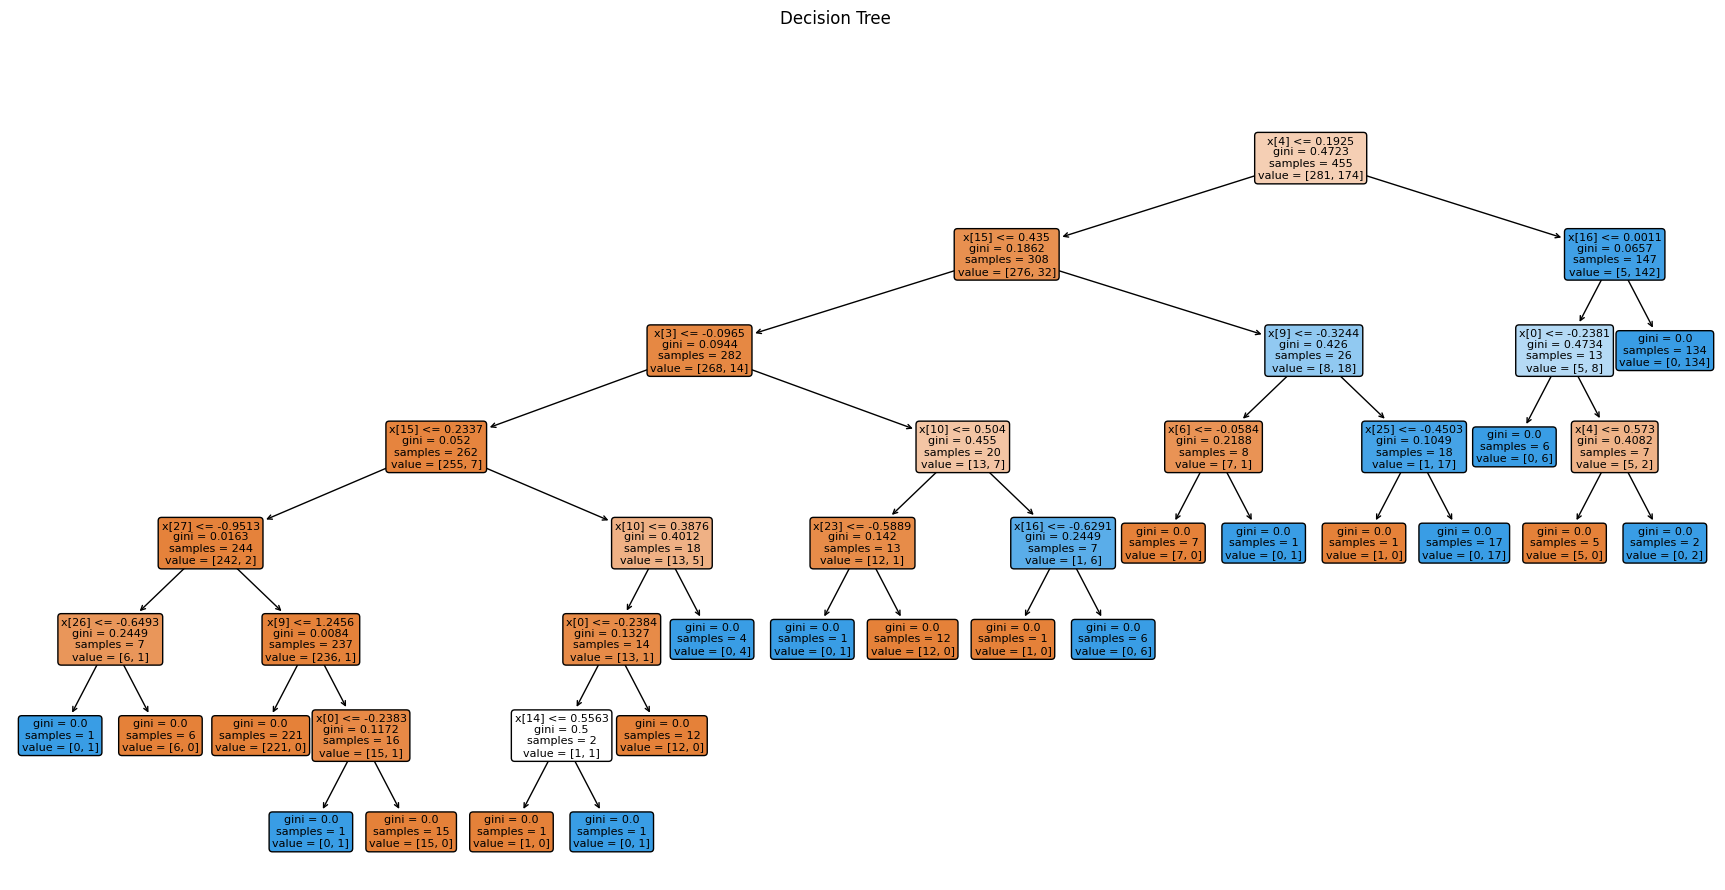

In [1319]:
fig,axs = plt.subplots(figsize=(22,10))
tree.plot_tree(dtr_clf,filled=True,rounded=True,fontsize=8,precision=4)
plt.suptitle("Decision Tree")
plt.show()

## Random Forest

In [1320]:
from sklearn.ensemble import RandomForestClassifier
rand_clf=RandomForestClassifier(random_state=42,n_estimators=100,min_samples_split=8)
rand_clf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=8, random_state=42)

In [1321]:
random_forest_score=rand_clf.score(X_test,y_test)
print(f'Train Score:{rand_clf.score(X_train,y_train)}\nTest Score: {random_forest_score}')

Train Score:0.9934065934065934
Test Score: 0.9912280701754386


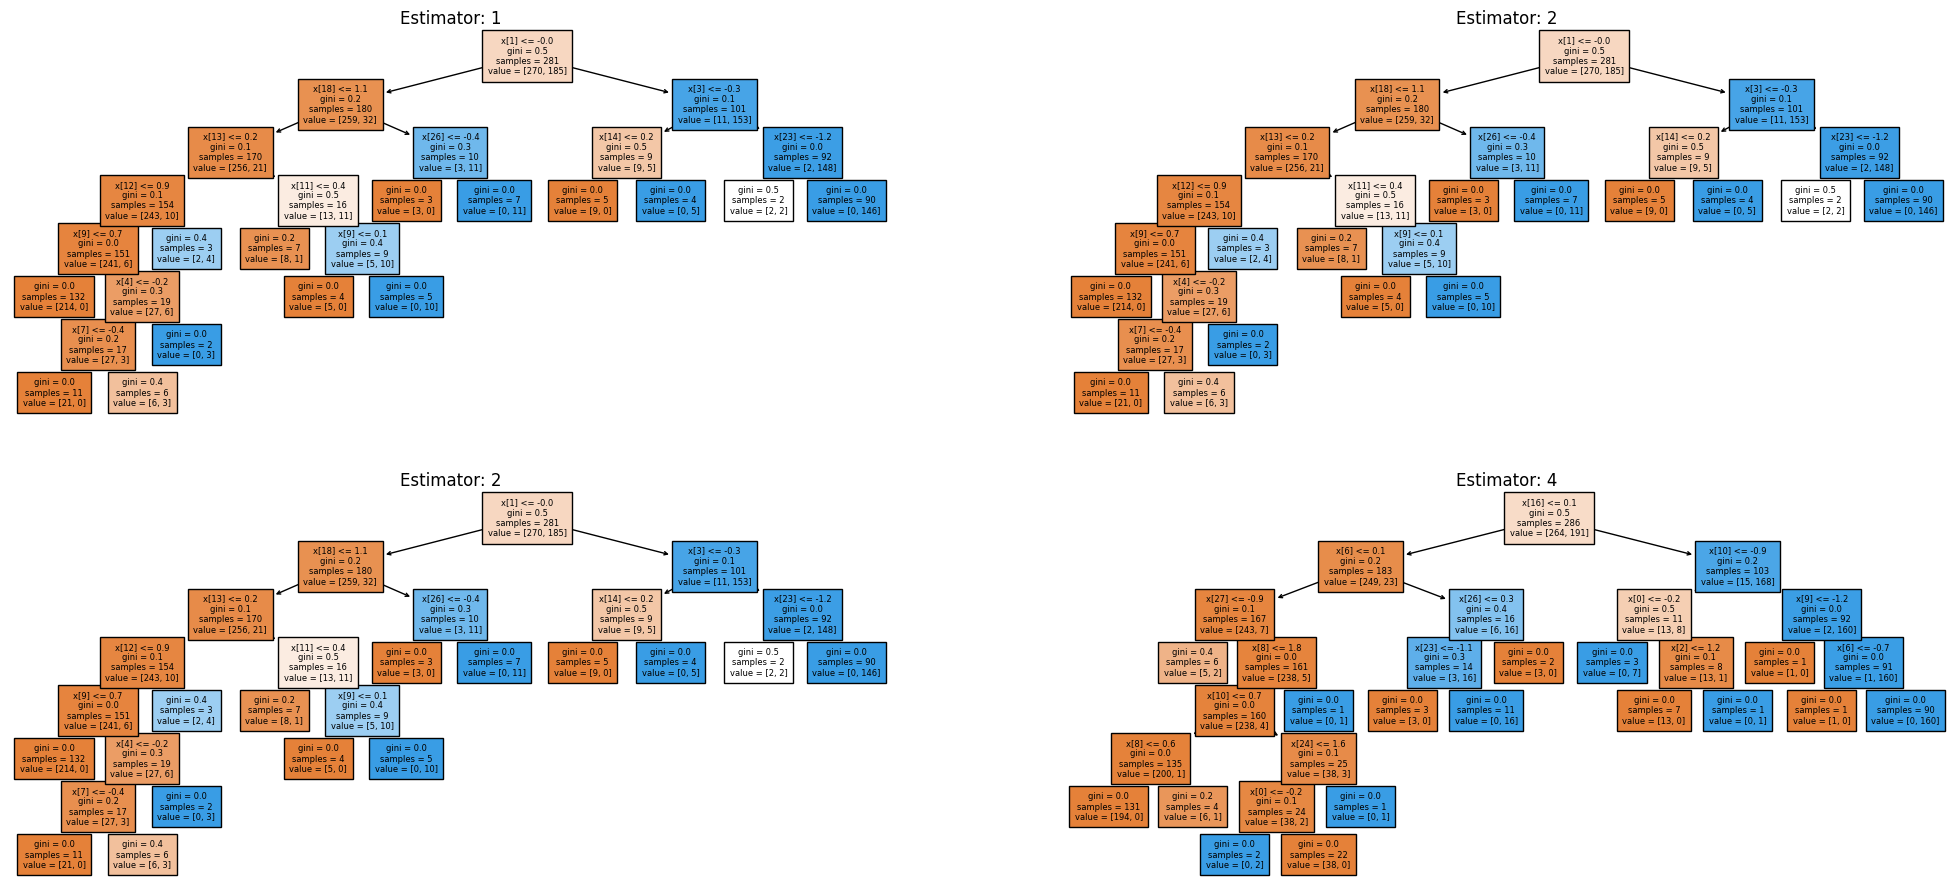

In [1322]:
# plotting each estimator
fig, axes = plt.subplots(nrows = 2,ncols = 2,figsize=(25,11))
for row in range(2):  
  for index in range(2):
    tree.plot_tree(rand_clf.estimators_[index*row],
                   filled = True,
                   ax = axes[row][index],precision=1,fontsize=6)

    axes[row][index].set_title('Estimator: ' + str((index+1)*(row+1)), fontsize = 12)

## KNN

In [1323]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=11)
knn_clf.fit(X_train,y_train)
knn_score=knn_clf.score(X_test,y_test)
print(f'Train Score:{knn_clf.score(X_train,y_train)}\nTest Score: {knn_score}')

Train Score:0.967032967032967
Test Score: 0.9736842105263158


## Support Vector Machines


In [1324]:
from sklearn import svm
svm_clf=svm.SVC(C=9, kernel='linear', gamma=0.1)
svm_clf.fit(X_train,y_train)

SVC(C=9, gamma=0.1, kernel='linear')

In [1325]:
svm_score=svm_clf.score(X_test,y_test)
svm_score
print(f'Train Score:{svm_clf.score(X_train,y_train)}\nTest Score: {svm_score}')

Train Score:0.9868131868131869
Test Score: 0.9824561403508771


# Best Model

In [1326]:
print('SVM: ',svm_score)
print('KNN: ',knn_score)
print('Logistic regression: ',logistic_score)
print('Random Forest: ',random_forest_score)
print('Decision Tree: ',decision_tree_score)

#Best model here is Random Forest > Logistic Regression = SVM > KNN > Decision Tree

SVM:  0.9824561403508771
KNN:  0.9736842105263158
Logistic regression:  0.9824561403508771
Random Forest:  0.9912280701754386
Decision Tree:  0.9649122807017544


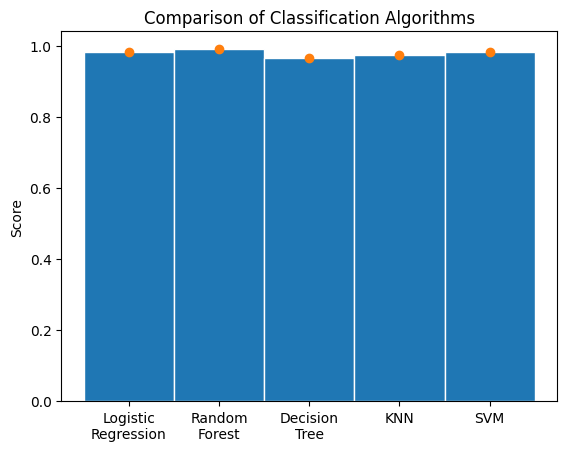

In [1327]:
y = np.array([logistic_score,random_forest_score,decision_tree_score,knn_score,svm_score])
x = ["Logistic\nRegression","Random\nForest","Decision\nTree","KNN","SVM"]
plt.bar(x, y, width=1.0, edgecolor="white")
plt.scatter(x,y)
plt.title("Comparison of Classification Algorithms")
plt.ylabel("Score")
plt.show()

## Best model: **Random Forest**







# Thank You 
# Mahmoud Mansy
